<a href="https://colab.research.google.com/github/AhmedCode99/23-Homework6G2/blob/main/task1_adaptive_trap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In the upcoming cell we have adaptive_trapezoid(), cumulative_integral_adaptive_trap(), f(), g(), and h()

## $f(x) = exp(-1/x)$
## $g(x) = cos(1/x)$
## $h(x) = x^3 + 1/2$

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def adaptive_trapezoid(f, a, b, acc, output=False):
    """
    Uses the adaptive trapezoidal method to compute the definite integral
    of f from a to b to desired accuracy acc.
    """
    old_s = np.inf
    h = b - a
    n = 1
    s = (f(a) + f(b)) * 0.5
    if output == True :
        print ("N = " + str(n+1) + ",  Integral = " + str( h*s ))
    while abs(h * (old_s - s*0.5)) > acc :
        old_s = s
        for i in np.arange(n) :
            s += f(a + (i + 0.5) * h)
        n *= 2.
        h *= 0.5
        if output == True :
            print ("N = " + str(n) + ",  Integral = " + str( h*s ))
    return h * s


def cumulative_integral_adaptive_trap(f,a,b,dx):
    """Function that calculates the antidervative function of f"""

    x_values = np.arange(a,b,dx)

    num_of_steps = np.floor((b-a)/dx)

    antiderivative = np.empty(len(x_values)+1)

    antiderivative[0] = adaptive_trapezoid(f, a, a+dx, 10)

    j = 1

    while j <= num_of_steps :

      antiderivative[j] = antiderivative[j-1] + adaptive_trapezoid(f, a+((j-1)*dx), a+(j*dx), 10)

      j = j + 1

    return antiderivative[:-1], x_values

def f(x):
    # Replace zero values in x with a small positive value to avoid division by zero
    x_safe = np.where(x == 0, np.finfo(float).eps, x)

    return np.exp(-1 / x_safe)

def g(x):
    # Replace zero values in x with a small positive value to avoid division by zero
    x_safe = np.where(x == 0, np.finfo(float).eps, x)

    return np.cos(1 / x_safe)

def h(x):
  return (x*x*x)+(1/2)

# In the upcoming cell adaptive_trapezoid() is used to estimate the integrals of the three functions over the require limits.

In [12]:
function_list = np.array([f,g,h])
function_list_str = ["exp(-1/x)","cos(1/x)","(x^3)+(1/2)"]
lower_limit = np.array([0.0, 0.0, -1.0])
upper_limit = np.array([20.0, 2.0*np.pi, 1.0])
dx = 0.01
n=1000
divergence_limit = 50000 # A number above which the integral is divergent

In [13]:
for j in range(len(lower_limit)):
  for i in range(len(lower_limit)):
    integration = adaptive_trapezoid(function_list[j], lower_limit[i], upper_limit[i], n)

    if integration < divergence_limit:
      print("The Adaptive Trapezoid integration of {} from {} to {}, is {}".format(function_list_str[j],
        lower_limit[i], np.round(upper_limit[i],2), np.round(integration,2)))
    else: print("The Adaptive Trapezoid integration of {} from {} to {}, is divergent".format(function_list_str[j],
        lower_limit[i], np.round(upper_limit[i],2)))

The Adaptive Trapezoid integration of exp(-1/x) from 0.0 to 20.0, is 13.8
The Adaptive Trapezoid integration of exp(-1/x) from 0.0 to 6.28, is 3.62
The Adaptive Trapezoid integration of exp(-1/x) from -1.0 to 1.0, is 1.54
The Adaptive Trapezoid integration of cos(1/x) from 0.0 to 20.0, is 12.52
The Adaptive Trapezoid integration of cos(1/x) from 0.0 to 6.28, is 3.77
The Adaptive Trapezoid integration of cos(1/x) from -1.0 to 1.0, is 0.05
The Adaptive Trapezoid integration of (x^3)+(1/2) from 0.0 to 20.0, is 40635.0
The Adaptive Trapezoid integration of (x^3)+(1/2) from 0.0 to 6.28, is 490.19
The Adaptive Trapezoid integration of (x^3)+(1/2) from -1.0 to 1.0, is 1.0


# Plots of $f(x) = exp(-1/x)$


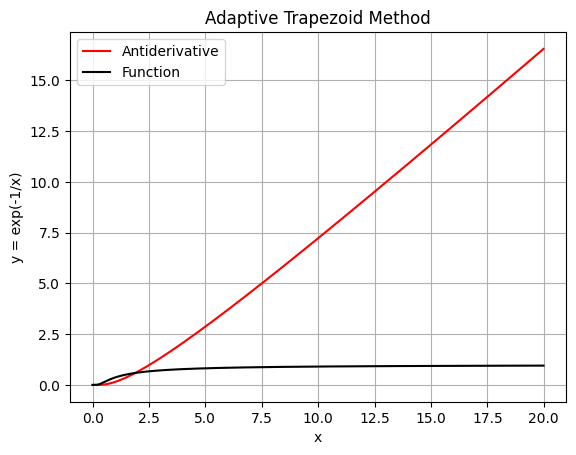

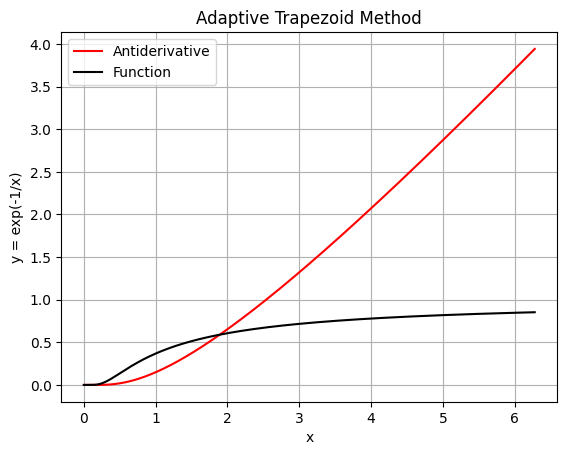

In [14]:
for i in range(len(lower_limit)-1):

  integral, x = cumulative_integral_adaptive_trap(f,lower_limit[i],upper_limit[i],dx)
  yvals = f(x)

  plt.plot(x, integral, c='Red', label = "Antiderivative")
  plt.plot(x, yvals,c='Black', label = "Function")
  plt.xlabel("x")
  plt.ylabel("y = exp(-1/x)")
  #plt.ylim(-1, 20)
  #plt.axis('tight')
  #plt.autoscale(axis='y')
  plt.grid(True)
  plt.title("Adaptive Trapezoid Method")
  plt.legend()
  plt.show()

<ipython-input-11-feb85d6394a8>:51: RuntimeWarning: overflow encountered in exp
  return np.exp(-1 / x_safe)
<ipython-input-11-feb85d6394a8>:15: RuntimeWarning: invalid value encountered in double_scalars
  while abs(h * (old_s - s*0.5)) > acc :


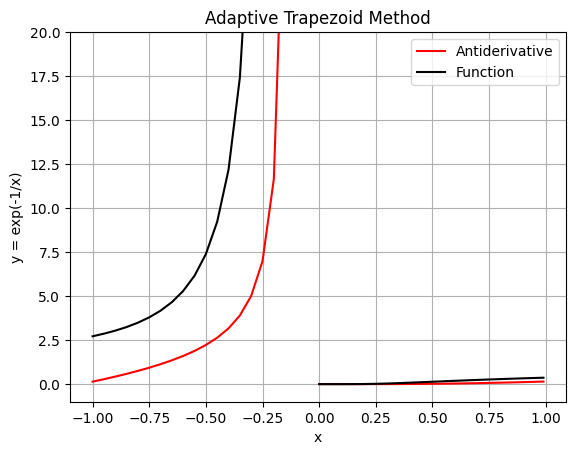

In [24]:
integral1, x1 = cumulative_integral_adaptive_trap(f,-1.0,0.0,0.05)

integral2, x2 = cumulative_integral_adaptive_trap(f,0.0,1.0,0.01)

yvals1 = f(x1)

yvals2 = f(x2)

plt.plot(x1, integral1, c='Red', label = "Antiderivative")
plt.plot(x1, yvals1,c='Black', label = "Function")
plt.plot(x2, integral2, c='Red')
plt.plot(x2, yvals2,c='Black')
plt.xlabel("x")
plt.ylabel("y = exp(-1/x)")
plt.ylim(-1, 20)
#plt.axis('tight')
#plt.autoscale(axis='y')
plt.grid(True)
plt.title("Adaptive Trapezoid Method")
plt.legend()
plt.show()

<ipython-input-11-feb85d6394a8>:51: RuntimeWarning: overflow encountered in exp
  return np.exp(-1 / x_safe)
<ipython-input-11-feb85d6394a8>:15: RuntimeWarning: invalid value encountered in double_scalars
  while abs(h * (old_s - s*0.5)) > acc :


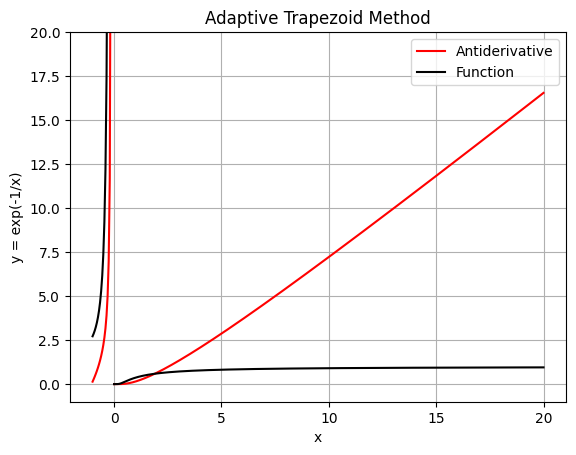

In [25]:
integral1, x1 = cumulative_integral_adaptive_trap(f,-1.0,0.0,0.05)

integral2, x2 = cumulative_integral_adaptive_trap(f,0.0,20.0,0.01)

yvals1 = f(x1)

yvals2 = f(x2)

plt.plot(x1, integral1, c='Red', label = "Antiderivative")
plt.plot(x1, yvals1,c='Black', label = "Function")
plt.plot(x2, integral2, c='Red')
plt.plot(x2, yvals2,c='Black')
plt.xlabel("x")
plt.ylabel("y = exp(-1/x)")
plt.ylim(-1, 20)
#plt.axis('tight')
#plt.autoscale(axis='y')
plt.grid(True)
plt.title("Adaptive Trapezoid Method")
plt.legend()
plt.show()

# Plots of $g(x) = cos(1/x)$


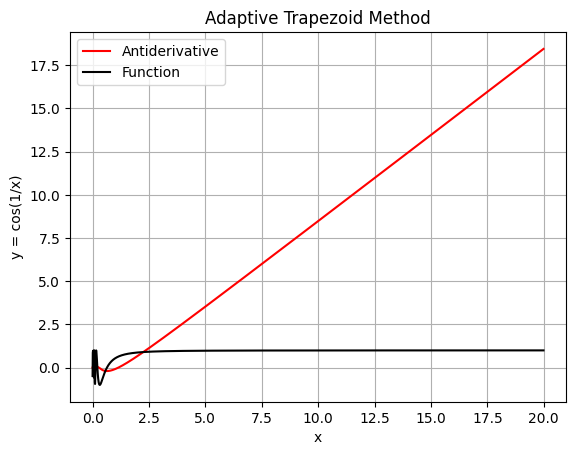

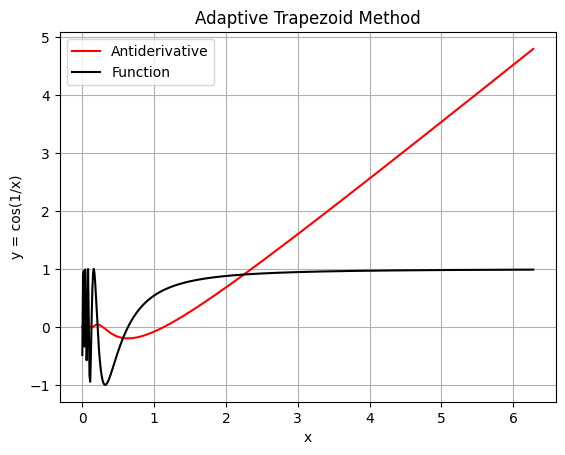

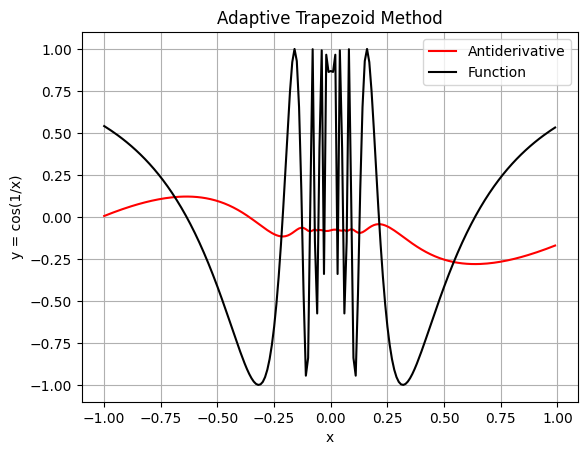

In [26]:
for i in range(len(lower_limit)):

  integral, x = cumulative_integral_adaptive_trap(g,lower_limit[i],upper_limit[i],dx)
  yvals = g(x)

  plt.plot(x, integral, c='Red', label = "Antiderivative")
  plt.plot(x, yvals,c='Black', label = "Function")
  plt.xlabel("x")
  plt.ylabel("y = cos(1/x)")
  #plt.ylim(-1, 20)
  #plt.axis('tight')
  #plt.autoscale(axis='y')
  plt.grid(True)
  plt.title("Adaptive Trapezoid Method")
  plt.legend()
  plt.show()

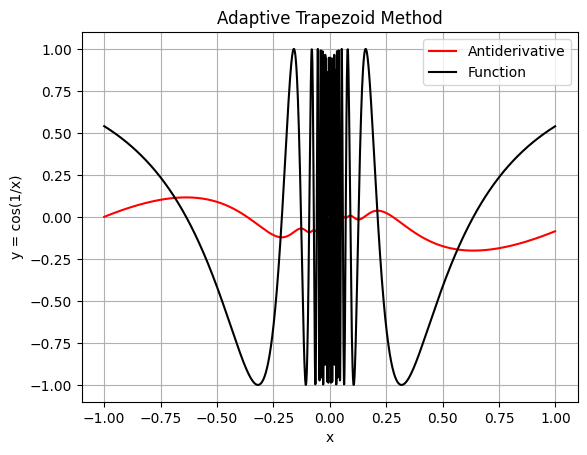

In [27]:
integral1, x1 = cumulative_integral_adaptive_trap(g,-1.0,0.0,0.001)

integral2, x2 = cumulative_integral_adaptive_trap(g,0.0,1,0.001)

yvals1 = g(x1)

yvals2 = g(x2)

plt.plot(x1, integral1, c='Red', label = "Antiderivative")
plt.plot(x1, yvals1,c='Black', label = "Function")
plt.plot(x2, integral2, c='Red')
plt.plot(x2, yvals2,c='Black')
plt.xlabel("x")
plt.ylabel("y = cos(1/x)")
#plt.ylim(-1, 20)
#plt.axis('tight')
#plt.autoscale(axis='y')
plt.grid(True)
plt.title("Adaptive Trapezoid Method")
plt.legend()
plt.show()

# Plots of $h(x) = x^3 + 1/2$


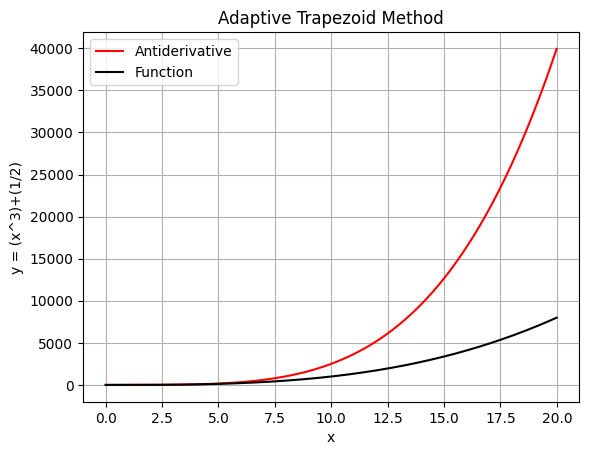

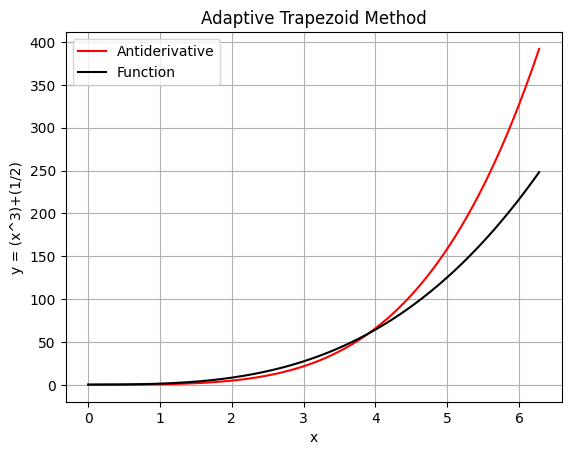

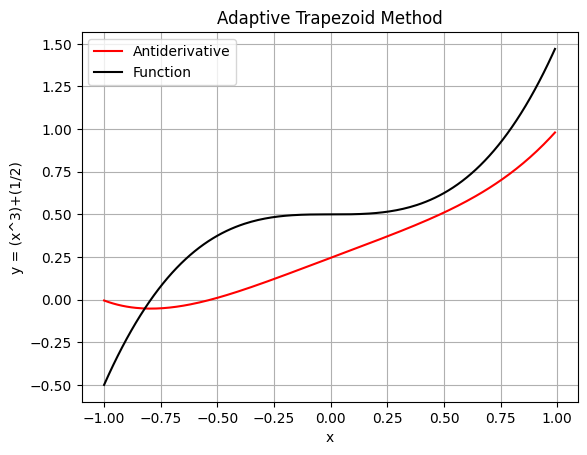

In [28]:
for i in range(len(lower_limit)):

  integral, x = cumulative_integral_adaptive_trap(h,lower_limit[i],upper_limit[i],dx)
  yvals = h(x)

  plt.plot(x, integral, c='Red', label = "Antiderivative")
  plt.plot(x, yvals,c='Black', label = "Function")
  plt.xlabel("x")
  plt.ylabel("y = (x^3)+(1/2)")
  #plt.ylim(-1, 20)
  #plt.axis('tight')
  #plt.autoscale(axis='y')
  plt.grid(True)
  plt.title("Adaptive Trapezoid Method")
  plt.legend()
  plt.show()